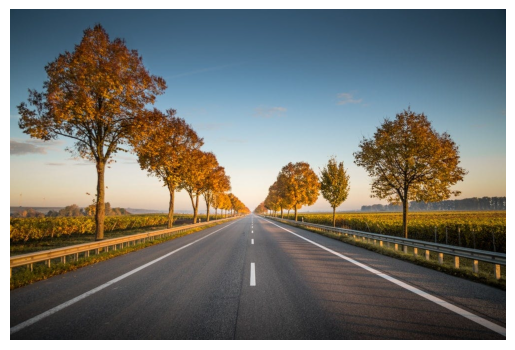

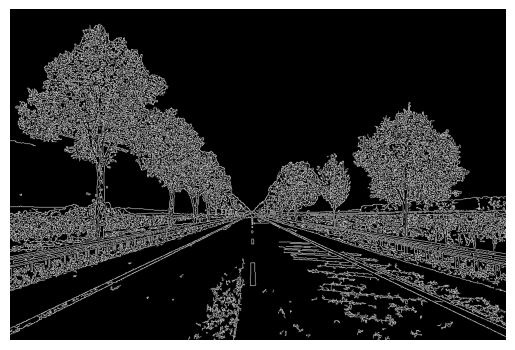

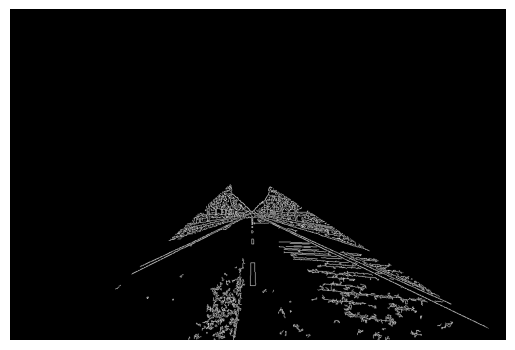

C:\Users\nmtab\AppData\Local\Temp\ipykernel_13820\847183694.py:98: RankWarning: Polyfit may be poorly conditioned
  averaged_lines = average(copy, lines)


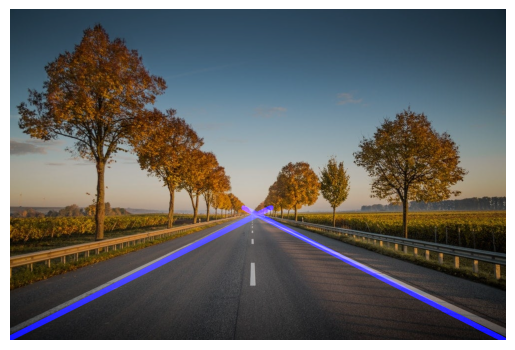

In [12]:
#source:https://medium.com/analytics-vidhya/building-a-lane-detection-system-f7a727c6694

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

#ROAD LANE DETECTION

#image_path = r"road.jpeg"
image_path = "C:\\Users\\nmtab\\Dropbox\\Dhofar_University\\Courses\\2023-2024\\Fall\\CMPS440\\jupyter\\ComputerVision\\roadLineDetecting\\road.jpg"

image1 = cv2.imread(image_path)

# Check if the image loaded correctly
if image1 is None:
    print("Error loading the image")
    raise SystemExit("Failed to load the image!")

# Display the loaded image using matplotlib
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')  # to remove axes
plt.show()

def grey(image):
    # convert to grayscale
    image = np.asarray(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def gauss(image):
    # Apply Gaussian Blur --> Reduce noise and smoothen image
    return cv2.GaussianBlur(image, (5, 5), 0)

def canny(image):
    # outline the strongest gradients in the image --> this is where lines in the image are
    return cv2.Canny(image,50,150)

def region(image):
    height, width = image.shape
    triangle = np.array([
                       [(100, height), (475, 325), (width, height)]
                       ])
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask, triangle, 255)
    return cv2.bitwise_and(image, mask)

def display_lines(image, lines):
    lines_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return lines_image

def average(image, lines):
    left = []
    right = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            parameters = np.polyfit((x1, x2), (y1, y2), 1)
            slope = parameters[0]
            y_int = parameters[1]
            if slope < 0:
                left.append((slope, y_int))
            else:
                right.append((slope, y_int))

    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line])

def make_points(image, average):
    slope, y_int = average
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2])

# DETECTING lane lines in image
copy = np.copy(image1)
edges = cv2.Canny(copy,50,150)
isolated = region(edges)

# Display the images using matplotlib
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(isolated, cmap='gray')
plt.axis('off')
plt.show()

lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
averaged_lines = average(copy, lines)
black_lines = display_lines(copy, averaged_lines)
lanes = cv2.addWeighted(copy, 0.8, black_lines, 1, 1)

plt.imshow(cv2.cvtColor(lanes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
